In [14]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import imageio

# Setting directory 

In [15]:
import os
os.getcwd()

'C:\\Users\\Admin\\Desktop\\DS HSAI\\instu samples\\DevanagariHandwrittenCharacterDataset\\Train'

In [16]:
os.chdir(r'C:\Users\Admin\Desktop\DS HSAI\instu samples\DevanagariHandwrittenCharacterDataset\Train')

In [17]:
a=os.listdir(r"C:\Users\Admin\Desktop\DS HSAI\instu samples\DevanagariHandwrittenCharacterDataset\Train") #getting the list of files in the directory

In [18]:
a=list(a)


# Data preprocessing for train

In [19]:
# getting the images from the files and giving labels to them 
y=[]
x=[]
z=[]
for i in a: 
    y.append(i.split('_')[-1])
    for k in os.listdir('./'+i):
        x.append(imageio.imread('./'+i+'/'+k))
        z.append(i.split('_')[-1])

yna


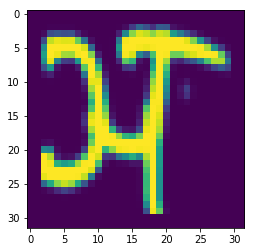

In [20]:
plt.imshow(x[524])
print(z[524])

In [21]:
j=sorted(list(set(y))) 
z1=[]
for k in z:
    z1.append(j.index(k))


y_train=to_categorical(z1)

In [22]:
# onehotencoding
j=sorted(list(set(y)))
zmr=np.zeros([len(x),len(y)])
for i,k in enumerate(z):
    zmr[i,j.index(k)]=1

In [23]:
print(zmr.shape)  # using onehotencoding 
print(y_train.shape)   # using to_categorical in keras.utils


(78200, 46)
(78200, 46)


In [24]:
x_train=np.asarray(x)
x_train.shape

(78200, 32, 32)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
daa


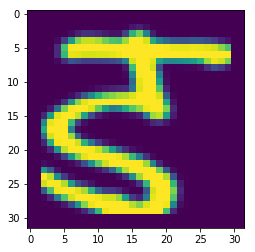

In [27]:
print(y_train[5263])
print(z[5263])
plt.imshow(x_train[5263])

# Data preprocessing for test


In [28]:
y=[]
x=[]
z_=[]
for i in a:
    y.append(i.split('_')[-1])
    for k in os.listdir('./'+i):
        x.append(imageio.imread('./'+i+'/'+k))
        z_.append(i.split('_')[-1]) 

In [29]:
j=sorted(list(set(y)))
z1=[]
for k in z_:
    z1.append(j.index(k))


y_test=to_categorical(z1)
y_test.shape

(78200, 46)

In [30]:
x_test=np.asarray(x)
x_test.shape

(78200, 32, 32)

In [32]:
#x_test1=x_test.reshape(13800,32,32,1)
#x_train1=x_train.reshape(78200,32,32,1)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
daa


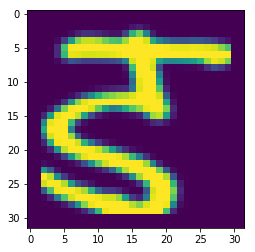

In [34]:
print(y_test[5263])
print(z_[5263])
plt.imshow(x_test[5263])

# CNN Architecture

In [35]:
from keras.models import Sequential 
from keras.layers import Convolution2D,Flatten,Dense,MaxPool2D,Dropout

In [36]:
from keras import optimizers 
SGD = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

Instructions for updating:
Colocations handled automatically by placer.


In [37]:
epoch=5
batchs=32

cnn=Sequential()
cnn.add(Convolution2D(filters=32, kernel_size=(2,2),padding='same', input_shape=(32,32,1),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))

cnn.add(Convolution2D(filters=64, kernel_size=(2, 2), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))

cnn.add(Convolution2D(filters=128, kernel_size=(2, 2), activation='relu'))
#cnn.add(MaxPool2D(pool_size=(2, 2)))

cnn.add(Convolution2D(filters=64, kernel_size=(2, 2), activation='relu'))
#cnn.add(MaxPool2D(pool_size=(2,2)))

cnn.add(Convolution2D(filters=128, kernel_size=(2, 2), activation='relu'))

cnn.add(Convolution2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2)))

cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))

cnn.add(Dense(46, activation='softmax'))

In [38]:
cnn.compile(optimizer=SGD, loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
cnn.fit(x_train1,y_train,batch_size=batchs,epochs=5,validation_data=(x_test1,y_test),shuffle=True,verbose=1)

NameError: name 'x_test1' is not defined